In [86]:
import numpy as np
import matplotlib.pyplot as plt


# convert a attribute file into attribute list: [[typename],[type1,type2,type3],[1,2,3]]
attribute = []
attribute.append([[0],[0],[1]])
with open('game_attributes.txt', 'r', encoding='utf-8') as attributes:
    for line in attributes:
        line = [x.strip("\n").split(",") for x in line.split(":")]
        line[1] = [x.strip(" ") for x in line[1]]
        line.append([x for x in range(len(line[1]))])
        print(line)
        attribute.append(line)
print(attribute)

[['dayOfWeek'], ['Weekday', 'Saturday', 'Sunday'], [0, 1, 2]]
[['timeOfDay'], ['morning', 'afternoon', 'evening'], [0, 1, 2]]
[['timeToPlay'], ['<30', '30-60', '>60'], [0, 1, 2]]
[['mood'], ['silly', 'happy', 'tired'], [0, 1, 2]]
[['friendsVisiting'], ['no', 'yes'], [0, 1]]
[['kidsPlaying'], ['no', 'yes'], [0, 1]]
[['atHome'], ['no', 'yes'], [0, 1]]
[['snacks'], ['no', 'yes'], [0, 1]]
[['game'], ['ApplesToApples', 'SettersOfCatan'], [0, 1]]
[[[0], [0], [1]], [['dayOfWeek'], ['Weekday', 'Saturday', 'Sunday'], [0, 1, 2]], [['timeOfDay'], ['morning', 'afternoon', 'evening'], [0, 1, 2]], [['timeToPlay'], ['<30', '30-60', '>60'], [0, 1, 2]], [['mood'], ['silly', 'happy', 'tired'], [0, 1, 2]], [['friendsVisiting'], ['no', 'yes'], [0, 1]], [['kidsPlaying'], ['no', 'yes'], [0, 1]], [['atHome'], ['no', 'yes'], [0, 1]], [['snacks'], ['no', 'yes'], [0, 1]], [['game'], ['ApplesToApples', 'SettersOfCatan'], [0, 1]]]


In [91]:
# vectorize file into vector with one-hot
def vectorize1(filename):
    x = []
    y = []
    with open(filename, 'r', encoding='utf-8') as data:
        for line in data:
            line = [x.strip() for x in line.split(',')]
            vector = [1]
            for i in range(len(line)):
                index = attribute[i+1][1].index(line[i])                
                if i <= 3:
                    value = [0,0,0]
                    value[index] = 1
                    vector+= value
                elif len(line)-1>i>3 :
                    value = attribute[i+1][2][index]
                    vector.append(value)
                else:
                    y.append(value)
            x.append(vector)
        return x,y


In [3]:
# vectorize file into vector without one-hot
def vectorize2(filename):
    x = []
    y = []
    y.append(1)
    x.append([1,1,1,1,1,1,1,1])
    with open(filename, 'r', encoding='utf-8') as data:
        for line in data:
            line = [x.strip() for x in line.split(',')]
            vector = []
            for i in range(len(line)):
                index = attribute[i][1].index(line[i])
                value = attribute[i][2][index]
                if i <len(line)-1:
                    vector.append(value)
                else:
                    y.append(value)
            x.append(vector)
        return x,y

In [92]:
x_train, y_train = vectorize1('game_attrdata_train.dat')
x_test, y_test = vectorize1('game_attrdata_test.dat')
print(x_train[:10])


[[1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1], [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0], [1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1]]


In [93]:



def h(x,w):
    if np.dot(w,x)>= 0:
        return 1
    else:
        return 0

def accuracy(w,x,y):
    true = 0
    for i in range(len(y)):
        if h(x[i],w) == y[i]:
            true+= 1
    accuracy = true/len(x)
    return accuracy

In [105]:
# acc is accuracy list[[],[],[],[]]. 0 is current model on train, 1 is average model on train, 
# 2 is current model on test, 3 is average model on test
acc = [[],[],[],[]]
# trainning iteration
w = np.zeros([len(x_train[0])])
t = np.zeros([len(x_train[0])])
def iteration(acc,x_train,x_test,w,t,iter):
    for k in range(iter):
        for i in range(len(x_train)):
            change = y_train[i]-h(x_train[i],w)
            w = w+ np.multiply(x_train[i], change)
            t = t + w
            ta = np.multiply(t, 1/((k+1)*n)) 
            acc[0].append(accuracy(w,x_train,y_train))
            acc[1].append(accuracy(ta,x_train,y_train))
            acc[2].append(accuracy(w,x_test,y_test))
            acc[3].append(accuracy(ta,x_test,y_test))
    return w,ta

w,ta = iteration(acc,x_train,x_test,w,t,1)
print(w,ta)

[-2. -1.  0. -1.  0. -1. -1.  0.  0. -2.  0. -1. -1.  0.  0. -1.  8.] [-1.65671642 -0.56218905 -0.45273632 -0.64179104  0.16915423 -0.92039801
 -0.90547264  0.01492537 -0.06965174 -1.60199005 -0.04477612 -0.67661692
 -0.93532338  0.41791045 -0.11940299 -0.77114428  6.56218905]


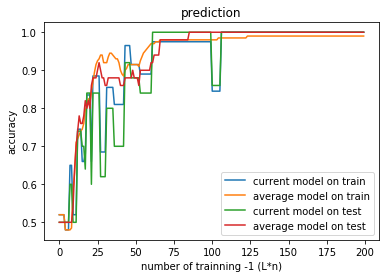

In [113]:

def plotaccuracy(acc,title):
    plt.plot(acc[0],label = "current model on train")
    plt.plot(acc[1],label = "average model on train")
    plt.plot(acc[2],label = "current model on test")
    plt.plot(acc[3],label = "average model on test")
    plt.legend()
    plt.ylabel("accuracy")
    plt.xlabel("number of trainning -1 (L*n)")
    plt.title(title)
    plt.show()
plotaccuracy(acc,"prediction")
# " the current model work better than the average model"

In [116]:
#print(w,ta)
print("""
the accurac, for the best model w is [-2. -1.  0. -1.  0. -1. -1.  0.  0. -2.  0. -1. -1.  0.  0. -1.  8.]
so the math description of decision function is w·X = 8x15-x1-x3-x5-x6-2x9-x11-x12-x15-2 
where threshold is 0, if bigger than threshold then predict value is SettersOfCatan, and otherwise
X = [1,'Weekday', 'Saturday', 'Sunday', 'morning', 'afternoon', 'evening','<30', '30-60', '>60', 'silly', 'happy', 'tired', 'friendsVisiting','kidsPlaying', 'atHome', 'snacks']
the attribute snacks plays the most important role that have coeffecient 10
""")

[-2. -1.  0. -1.  0. -1. -1.  0.  0. -2.  0. -1. -1.  0.  0. -1.  8.] [-1.65671642 -0.56218905 -0.45273632 -0.64179104  0.16915423 -0.92039801
 -0.90547264  0.01492537 -0.06965174 -1.60199005 -0.04477612 -0.67661692
 -0.93532338  0.41791045 -0.11940299 -0.77114428  6.56218905]

best model is the last current model, for the best model w is [-2. -1.  0. -1.  0. -1. -1.  0.  0. -2.  0. -1. -1.  0.  0. -1.  8.]
so the math description of decision function is w·X = 8x15-x1-x3-x5-x6-2x9-x11-x12-x15-2 
where threshold is 0, if bigger than threshold then predict value is SettersOfCatan, and otherwise
X = [1,'Weekday', 'Saturday', 'Sunday', 'morning', 'afternoon', 'evening','<30', '30-60', '>60', 'silly', 'happy', 'tired', 'friendsVisiting','kidsPlaying', 'atHome', 'snacks']
the attribute snacks plays the most important role that have coeffecient 10



In [117]:

def subplotaccuracy(acc,axes,fig,i,title):
    x = int(i/2)
    y = i-2*int(i/2)
    axes[x, y].plot(acc[0],label = "current model on train")
    axes[x, y].plot(acc[1],label = "average model on train")
    axes[x, y].plot(acc[2],label = "current model on test")
    axes[x, y].plot(acc[3],label = "average model on test")
    #axes[int(i/2), i-2*int(i/2)].legend()
    axes[x, y].set_ylabel("accuracy")
    axes[x, y].set_xlabel("number of trainning -1 (L*n)")
    axes[x, y].set_title(title)
    

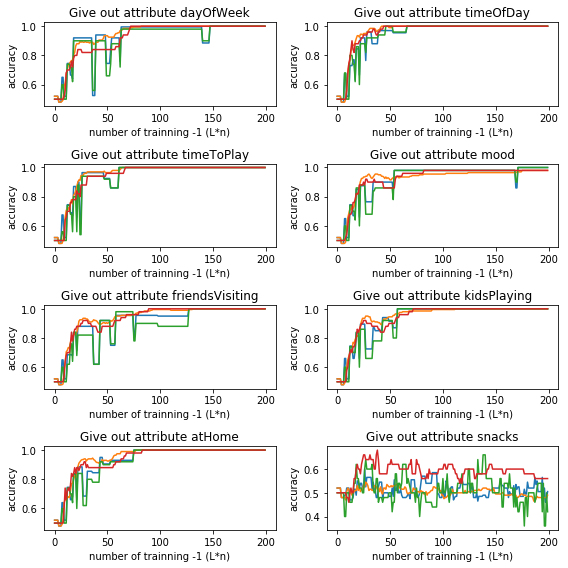

In [118]:
# ablation test
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))
def ablation(x_train,x_test):
    for i in range(8):
        acc = [[],[],[],[]]
            
        if i*3 <12:
            x_trim1 = [x[0:(i)*3+1]+x[(i+1)*3+1:] for x in x_train]
            x_trim2 = [x[0:(i)*3+1]+x[(i+1)*3+1:] for x in x_test]
        elif i <=7:
            x_trim1 = [x[0:9+i]+x[10+i:] for x in x_train]
            x_trim2 = [x[0:9+i]+x[10+i:] for x in x_test]
        else:
            x_trim1 = [x[0:9+i]for x in x_train]
            x_trim2 = [x[0:9+i]for x in x_train]
        w = np.zeros([len(x_trim1[0])])
        t = np.zeros([len(x_trim2[0])])
        w,ta = iteration(acc,x_trim1,x_trim2,w,t,1)
        subplotaccuracy(acc,axes,fig,i,"Give out %s %s"%("attribute",attribute[i+1][0][0]))
    fig.tight_layout()
    plt.show()
    

ablation(x_train,x_test)

From the plot above we can find that the attribute snacks plays the most importnat role for the class decision.


Examine the weights because it's more easy to find out the most important attribute than ablation test. Also if the weights are close on the influential attributes it's hard to figure out just by ablation test.